# `Classification`

Created by: Joanna Szczublińska

---

### <b>Outline for Today's Classes</b>

1. Importing necessary libraries  
2. Loading our first dataset [Binary Classification]  
   1. Understanding the data  
   2. Logistic Regression  
   3. K-Nearest Neighbors (KNN)  
   4. Decision Tree  
   5. Summary of all classifiers  
3. Experiments [Multilabel Classification]
4. Task for you [Binary Classification] 

---

To better understand the topic of classification especially how different classifiers work, we will be doing some hands-on practice here. In this notebook, we will cover both binary and multiclass classification. We'll also go over evaluation metrics to assess how well each model performs and at the end you’ll get a task to apply what you've learned in practice.

So let's start 😊

### `1.` Importing necessary libraries  

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, classification_report, ConfusionMatrixDisplay)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import plotly.graph_objects as go

### `2.` Loading our first dataset [Binary Classification]

We will start with a dataset about company employees and try to classify whether an employee will **leave** the company or **stay**.

You can find the dataset *Employee.csv* in the GitHub repository. 

You may also download it directly from the kaggle webpage (you need to have the profile): https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset 

In [123]:
data = pd.read_csv("datasets/Employee.csv")
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


### `2.1`  Understanding the data

Below I listed the column names along with short descriptions

| **Column**                   | **Description**                                                                 |
|-----------------------------|---------------------------------------------------------------------------------|
| **Education**               | The educational qualifications of employees, including degree, institution, and field of study. |
| **Joining Year**            | The year each employee joined the company, indicating their length of service. |
| **City**                    | The location or city where each employee is based or works.                    |
| **Payment Tier**            | Categorization of employees into different salary tiers.                       |
| **Age**                     | The age of each employee, providing demographic insights.                      |
| **Gender**                  | Gender identity of employees, promoting diversity analysis.                    |
| **Ever Benched**            | Indicates if an employee has ever been temporarily without assigned work.      |
| **Experience in Current Domain** | The number of years of experience employees have in their current field.         |
| **Leave or Not**            | Target column indicating whether the employee left the company or not.        |


In [124]:
# Checking the shape of our data
data.shape

(4653, 9)

In [125]:
# Checking the null values in the dataset
missing_values = data.isnull().sum()
print(missing_values)

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64


In [126]:
# Checking the number of duplicates in the dataset
duplicates = data.duplicated().sum()
print(duplicates)

data.drop_duplicates(inplace=True) #inplace=True means that the operation is performed directly on the original object

1889


In [127]:
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


Now we will visalize the distribution of our target class.

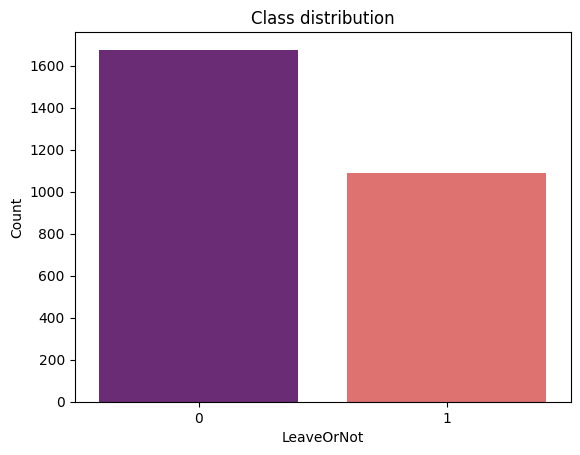

In [128]:
plt.figure()
sns.countplot(x='LeaveOrNot', hue='LeaveOrNot', data=data, palette='magma', legend=False)
plt.title("Class distribution")
plt.xlabel("LeaveOrNot")
plt.ylabel("Count")
plt.show()

Till now, we have checked the shape of our dataset, looked for any null values, and removed duplicates.
Now, when we examine our data we can see that some columns contain categorical values that need to be encoded, because most machine learning models require numerical input.

For the columns *‘EverBenched’* and *‘Gender’*, we can simply map the values to 0 and 1, as they contain only two categories.
For the other categorical columns, although it's technically possible to map categories to integers, a better practice is to use **one-hot encoding**. This method creates separate binary columns for each category and avoids implying any order or ranking between them.

Important to note: When using the `pd.get_dummies()` function for one-hot encoding, we can use the `drop_first `parameter:

- drop_first=**True** removes the first category for each encoded column. This helps avoid multicollinearity, which is especially important for models like linear regression that assume independent features.

- drop_first=**False** keeps all categories. This is more suitable for tree-based models (like decision trees or random forests), which are not sensitive to multicollinearity.

Because we plan to use both linear regression and decision trees, we should prepare our data using both approaches, one with drop_first=True and one with drop_first=False depending on the model we train. However, for simplicity, I will use only the **drop_first=False** option.

In [129]:
# Handling categorical values
data['EverBenched'] = data['EverBenched'].map({'No': 0, 'Yes': 1})
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

data_2 = pd.get_dummies(data, columns=['Education', 'City'], drop_first=True)
data = pd.get_dummies(data, columns=['Education', 'City'])

data.head()

,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune
0,2017,3,34,0,0,0,0,True,False,False,True,False,False
1,2013,1,28,1,0,3,1,True,False,False,False,False,True
2,2014,3,38,1,0,2,0,True,False,False,False,True,False
3,2016,3,27,0,0,5,1,False,True,False,True,False,False
4,2017,3,24,0,1,2,1,False,True,False,False,False,True


In [130]:
data_2.head()

,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Education_Masters,Education_PHD,City_New Delhi,City_Pune
0,2017,3,34,0,0,0,0,False,False,False,False
1,2013,1,28,1,0,3,1,False,False,False,True
2,2014,3,38,1,0,2,0,False,False,True,False
3,2016,3,27,0,0,5,1,True,False,False,False
4,2017,3,24,0,1,2,1,True,False,False,True


We observe that our table currently contains *True* and *False* values. To prepare the data for machine learning models, we convert these boolean values to *0* and *1* by changing their data type from bool to int.

In [131]:
data[data.select_dtypes('bool').columns] = data.select_dtypes('bool').astype(int)
data.head()

,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune
0,2017,3,34,0,0,0,0,1,0,0,1,0,0
1,2013,1,28,1,0,3,1,1,0,0,0,0,1
2,2014,3,38,1,0,2,0,1,0,0,0,1,0
3,2016,3,27,0,0,5,1,0,1,0,1,0,0
4,2017,3,24,0,1,2,1,0,1,0,0,0,1


We split the data into features (X) and target variable (y).

In [132]:
X = data.drop('LeaveOrNot', axis=1)
y = data['LeaveOrNot']

Now it is time for **standardization**, which is important because many machine learning algorithms work better when input features are on a similar scale. Features with very different ranges can cause models to perform poorly or learn inefficiently. Standardization scales features to have a *mean of 0* and a *standard deviation of 1*, helping models **learn faster** and **perform better** by treating all features equally.

In [133]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[ 1.01270119  0.58338184  0.59652788 ...  1.16635147 -0.6337371
  -0.63878706]
 [-1.10863726 -2.62231879 -0.57811215 ... -0.85737449 -0.6337371
   1.56546691]
 [-0.57830265  0.58338184  1.37962124 ... -0.85737449  1.57794138
  -0.63878706]
 ...
 [-1.10863726 -1.01946847  1.1838479  ... -0.85737449 -0.6337371
   1.56546691]
 [ 1.5430358   0.58338184 -0.77388549 ... -0.85737449  1.57794138
  -0.63878706]
 [-1.63897187  0.58338184 -0.18656548 ...  1.16635147 -0.6337371
  -0.63878706]]


It is time to split the data into training set (70%) and testing set (30%)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

---

### `2.2` Logistic Regression 

As a reminder Logistic Regression:
- predicts the probability that an input belongs to a class
- uses the logistic (sigmoid) function to output values between 0 and 1
- learns feature weights during training to separate classes

In [135]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [136]:
print("Logistic regression - metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print()
print(classification_report(y_test, y_pred_lr))

Logistic regression - metrics
Accuracy: 0.6831325301204819
Balanced Accuracy: 0.6423874940212752
Precision: 0.6517857142857143
Recall: 0.44108761329305135

              precision    recall  f1-score   support

           0       0.69      0.84      0.76       499
           1       0.65      0.44      0.53       331

    accuracy                           0.68       830
   macro avg       0.67      0.64      0.64       830
weighted avg       0.68      0.68      0.67       830



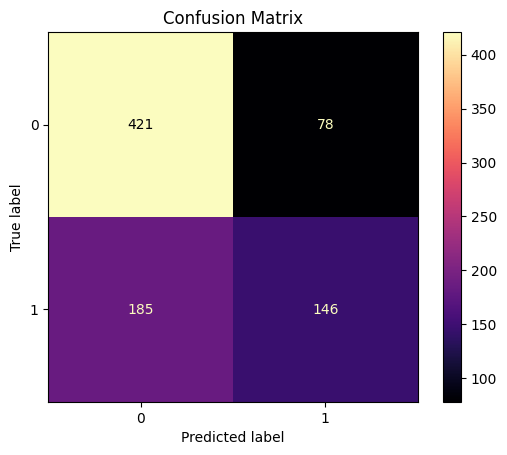

In [137]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, cmap='magma')
plt.title("Confusion Matrix")
plt.show()

<u>Some observations:</u>
- **Class 0 (Stayed)** -> High recall (84%) – the model correctly identifies most who stayed
- **Class 1 (Left)** -> Lower recall (44%) – the model misses many who actually left
- **Accuracy** -> 68%

<u>Conslusions:</u>
- The model is better at identifying employees who stay than those who leave
- Recall for class 1 is low -> it's missing many actual "leavers" (false negatives)

---

### `2.3` K-Nearest Neighbors (KNN) 

As a reminder KNN:
- is a non-parametric algorithm used for classification
- makes predictions based on the majority class among the k closest neighbors in the training data
- here’s no actual training phase, it simply stores the data (IMPORTANT TO NOTE)
- distance metric (typically Euclidean distance) determines similarity

In [138]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [139]:
print("K-Nearest Neighbors - metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print()
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors - metrics
Accuracy: 0.7228915662650602
Balanced Accuracy: 0.6973221367205711
Precision: 0.6823104693140795
Recall: 0.5709969788519638

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       499
           1       0.68      0.57      0.62       331

    accuracy                           0.72       830
   macro avg       0.71      0.70      0.70       830
weighted avg       0.72      0.72      0.72       830



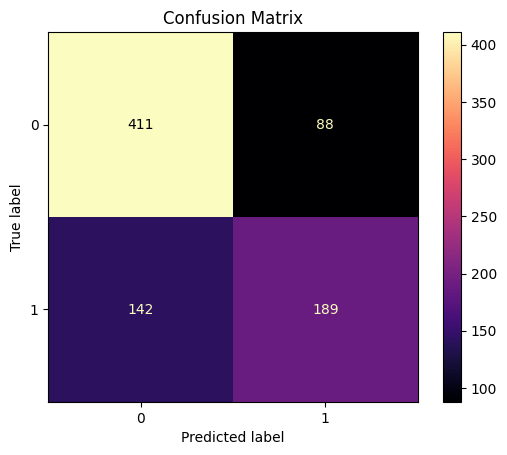

In [140]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, cmap='magma')
plt.title("Confusion Matrix")
plt.show()

#### * Making an optimization with `Elbow Method` (for choosing the best K)

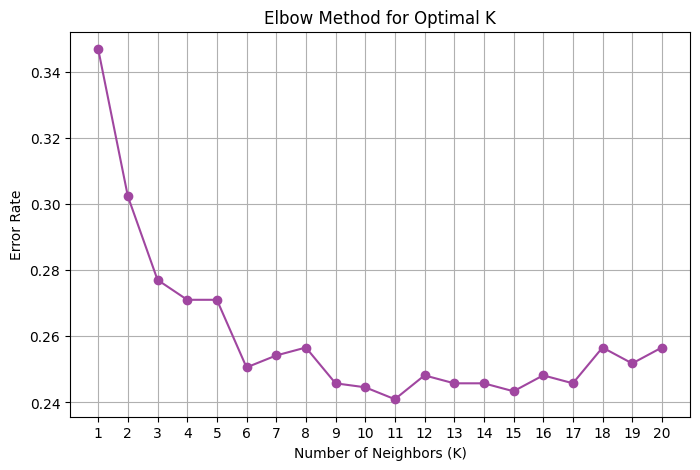

In [141]:
error_rates = []
k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred_k)
    error_rates.append(error)


plt.figure(figsize=(8, 5))
plt.plot(k_range, error_rates, marker='o', color=(160/255, 70/255, 160/255))
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Error Rate')
plt.xticks(k_range)
plt.grid(True)
plt.show()


As we can see, the values for k = 6 can be the best fitted in this case. Now we can rerun KNN and compare results.

In [142]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("K-Nearest Neighbors - metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print()
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors - metrics
Accuracy: 0.7493975903614458
Balanced Accuracy: 0.7046176946037089
Precision: 0.8121827411167513
Recall: 0.48338368580060426

              precision    recall  f1-score   support

           0       0.73      0.93      0.82       499
           1       0.81      0.48      0.61       331

    accuracy                           0.75       830
   macro avg       0.77      0.70      0.71       830
weighted avg       0.76      0.75      0.73       830



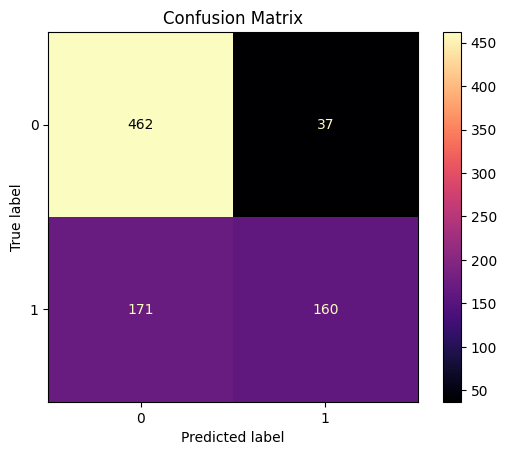

In [143]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, cmap='magma')
plt.title("Confusion Matrix")
plt.show()

<u>Results Comparison:</u>

| Metric            | KNN (k=3) | KNN (k=6) | Change (k6 - k3) |
| ----------------- | --------- | --------- | ---------------- |
| Accuracy          | 0.7229    | 0.7494    | +0.0265          |
| Balanced Accuracy | 0.6973    | 0.7046    | +0.0073          |
| Precision         | 0.6823    | 0.8122    | +0.1299          |
| Recall            | 0.5710    | 0.4834    | -0.0876          |


- Accuracy and Balanced Accuracy improved slightly
- Precision increased significantly, meaning the model with k=6 better predicts positive cases (fewer false positives).
- Recall decreased, indicating the model is less effective at identifying all positive cases (more false negatives).

<u>Overall conclusions:</u>
- KNN performs slightly better than logistic regression in this case.
- KNN shows stronger performance on the majority class (Stayed) but still reasonably identifies employees likely to leave.

---

### `2.4` Decision Tree 

As a reminder Decision Tree:
- is a non-parametric algorithm used for classification
- splits the dataset into branches based on feature values, forming a tree structure
- makes decisions by asking a yes/no questions which leads to a prediction at a leaf node
- does not require feature scaling or normalization
- is easy to interpret but can overfit if not pruned or regularized

In [144]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [145]:
print("Decision tree - metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print()
print(classification_report(y_test, y_pred_dt))

Decision tree - metrics
Accuracy: 0.7
Balanced Accuracy: 0.6828611906592641
Precision: 0.6305732484076433
Recall: 0.5981873111782477

              precision    recall  f1-score   support

           0       0.74      0.77      0.75       499
           1       0.63      0.60      0.61       331

    accuracy                           0.70       830
   macro avg       0.69      0.68      0.68       830
weighted avg       0.70      0.70      0.70       830



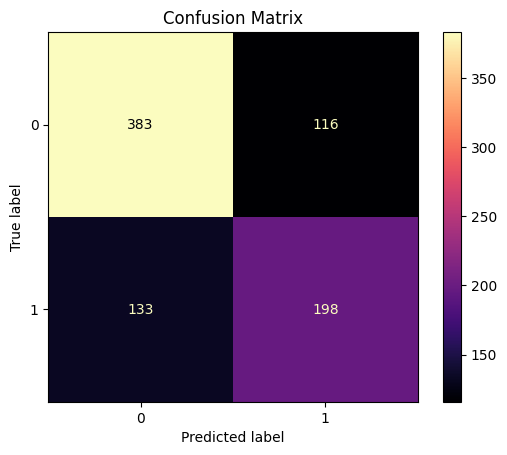

In [146]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, cmap='magma')
plt.title("Confusion Matrix")
plt.show()

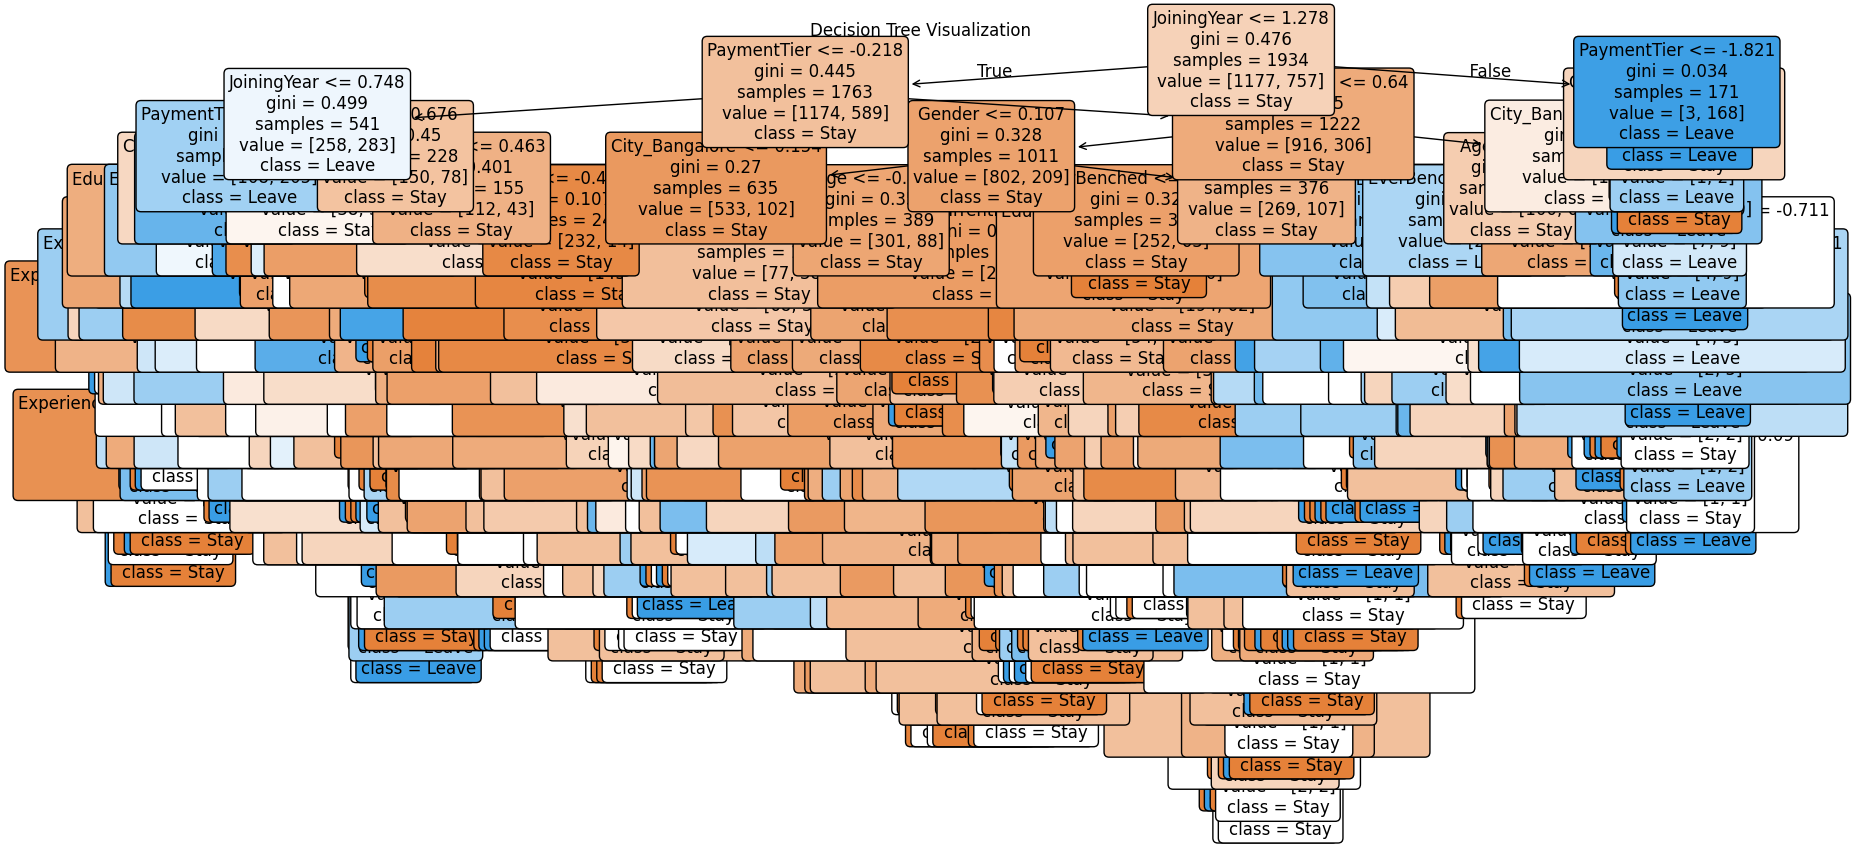

In [147]:
plt.figure(figsize=(20,10))
plot_tree(dt_model, 
          feature_names=data.drop('LeaveOrNot', axis=1).columns,  
          class_names=['Stay', 'Leave'], 
          filled=True,  
          rounded=True,
          fontsize=12)
plt.title("Decision Tree Visualization")
plt.show()


As we can see from the picture above, there is clear overfitting and a lack of structure.
Scikit-learn does not offer a direct post-pruning method (i.e., pruning after the tree has been fully grown), but we can control the tree's growth during training using pre-pruning parameters:
- maximum depth of the tree (limits how deep it can grow)
- minimum number of samples required to split an internal node
- minimum number of samples required to be at a leaf node
- maximum number of leaf nodes
- Minimal Cost-Complexity Pruning 

In our case I chose the last option. Therefore, `ccp_alpha` became our parameter to tune. It stands for **cost-complexity pruning alpha** and helps penalize overly complex trees by balancing accuracy and simplicity.


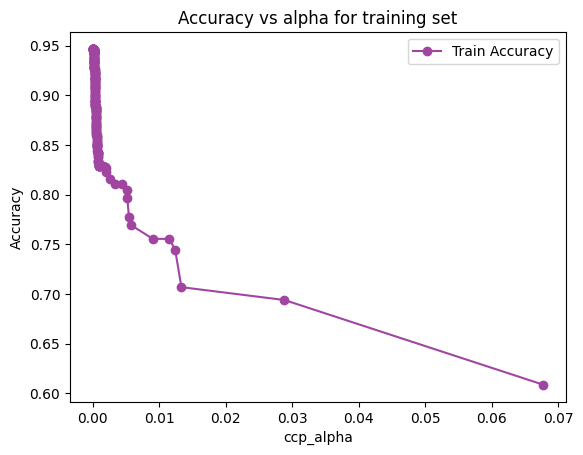

0.0


In [148]:
path = dt_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[ccp_alphas >= 0]

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_scores = [clf.score(X_train, y_train) for clf in clfs]

plt.figure()
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Accuracy',  color=(160/255, 70/255, 160/255))
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs alpha for training set')
plt.show()

print(ccp_alphas[0])

It is hard for us to estimate the value, so we can zoom in on our plot.

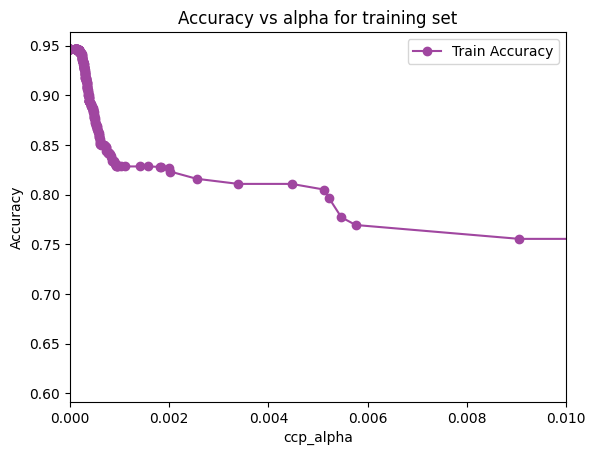

In [149]:
plt.figure()
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Accuracy',  color=(160/255, 70/255, 160/255))
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs alpha for training set')
plt.xlim(0, 0.01) 
plt.show()

We should not choose a ccp_alpha value equal to 0, because it performs perfectly on the training data but may lead to overfitting on the test set. Therefore, it's better to try other values. I chose alpha = 0.005 because after this treshold the accuracy changes just sligthly. Of course, you can experiment on your own to find the best one 😊

In [150]:
dt_model = DecisionTreeClassifier(random_state=42, ccp_alpha=0.002)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision tree - metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print()
print(classification_report(y_test, y_pred_dt))

Decision tree - metrics
Accuracy: 0.8048192771084337
Balanced Accuracy: 0.7771555194982109
Precision: 0.8313725490196079
Recall: 0.6404833836858006

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       499
           1       0.83      0.64      0.72       331

    accuracy                           0.80       830
   macro avg       0.81      0.78      0.79       830
weighted avg       0.81      0.80      0.80       830



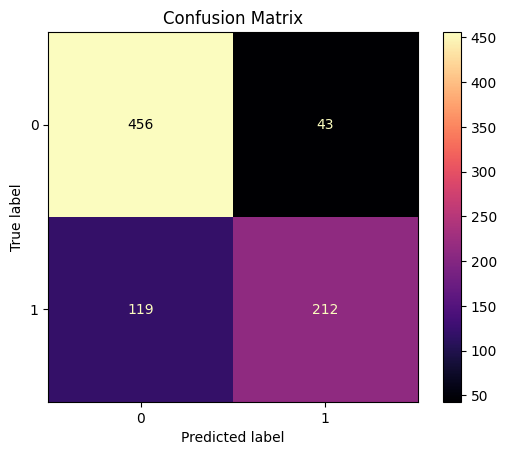

In [151]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, cmap='magma')
plt.title("Confusion Matrix")
plt.show()

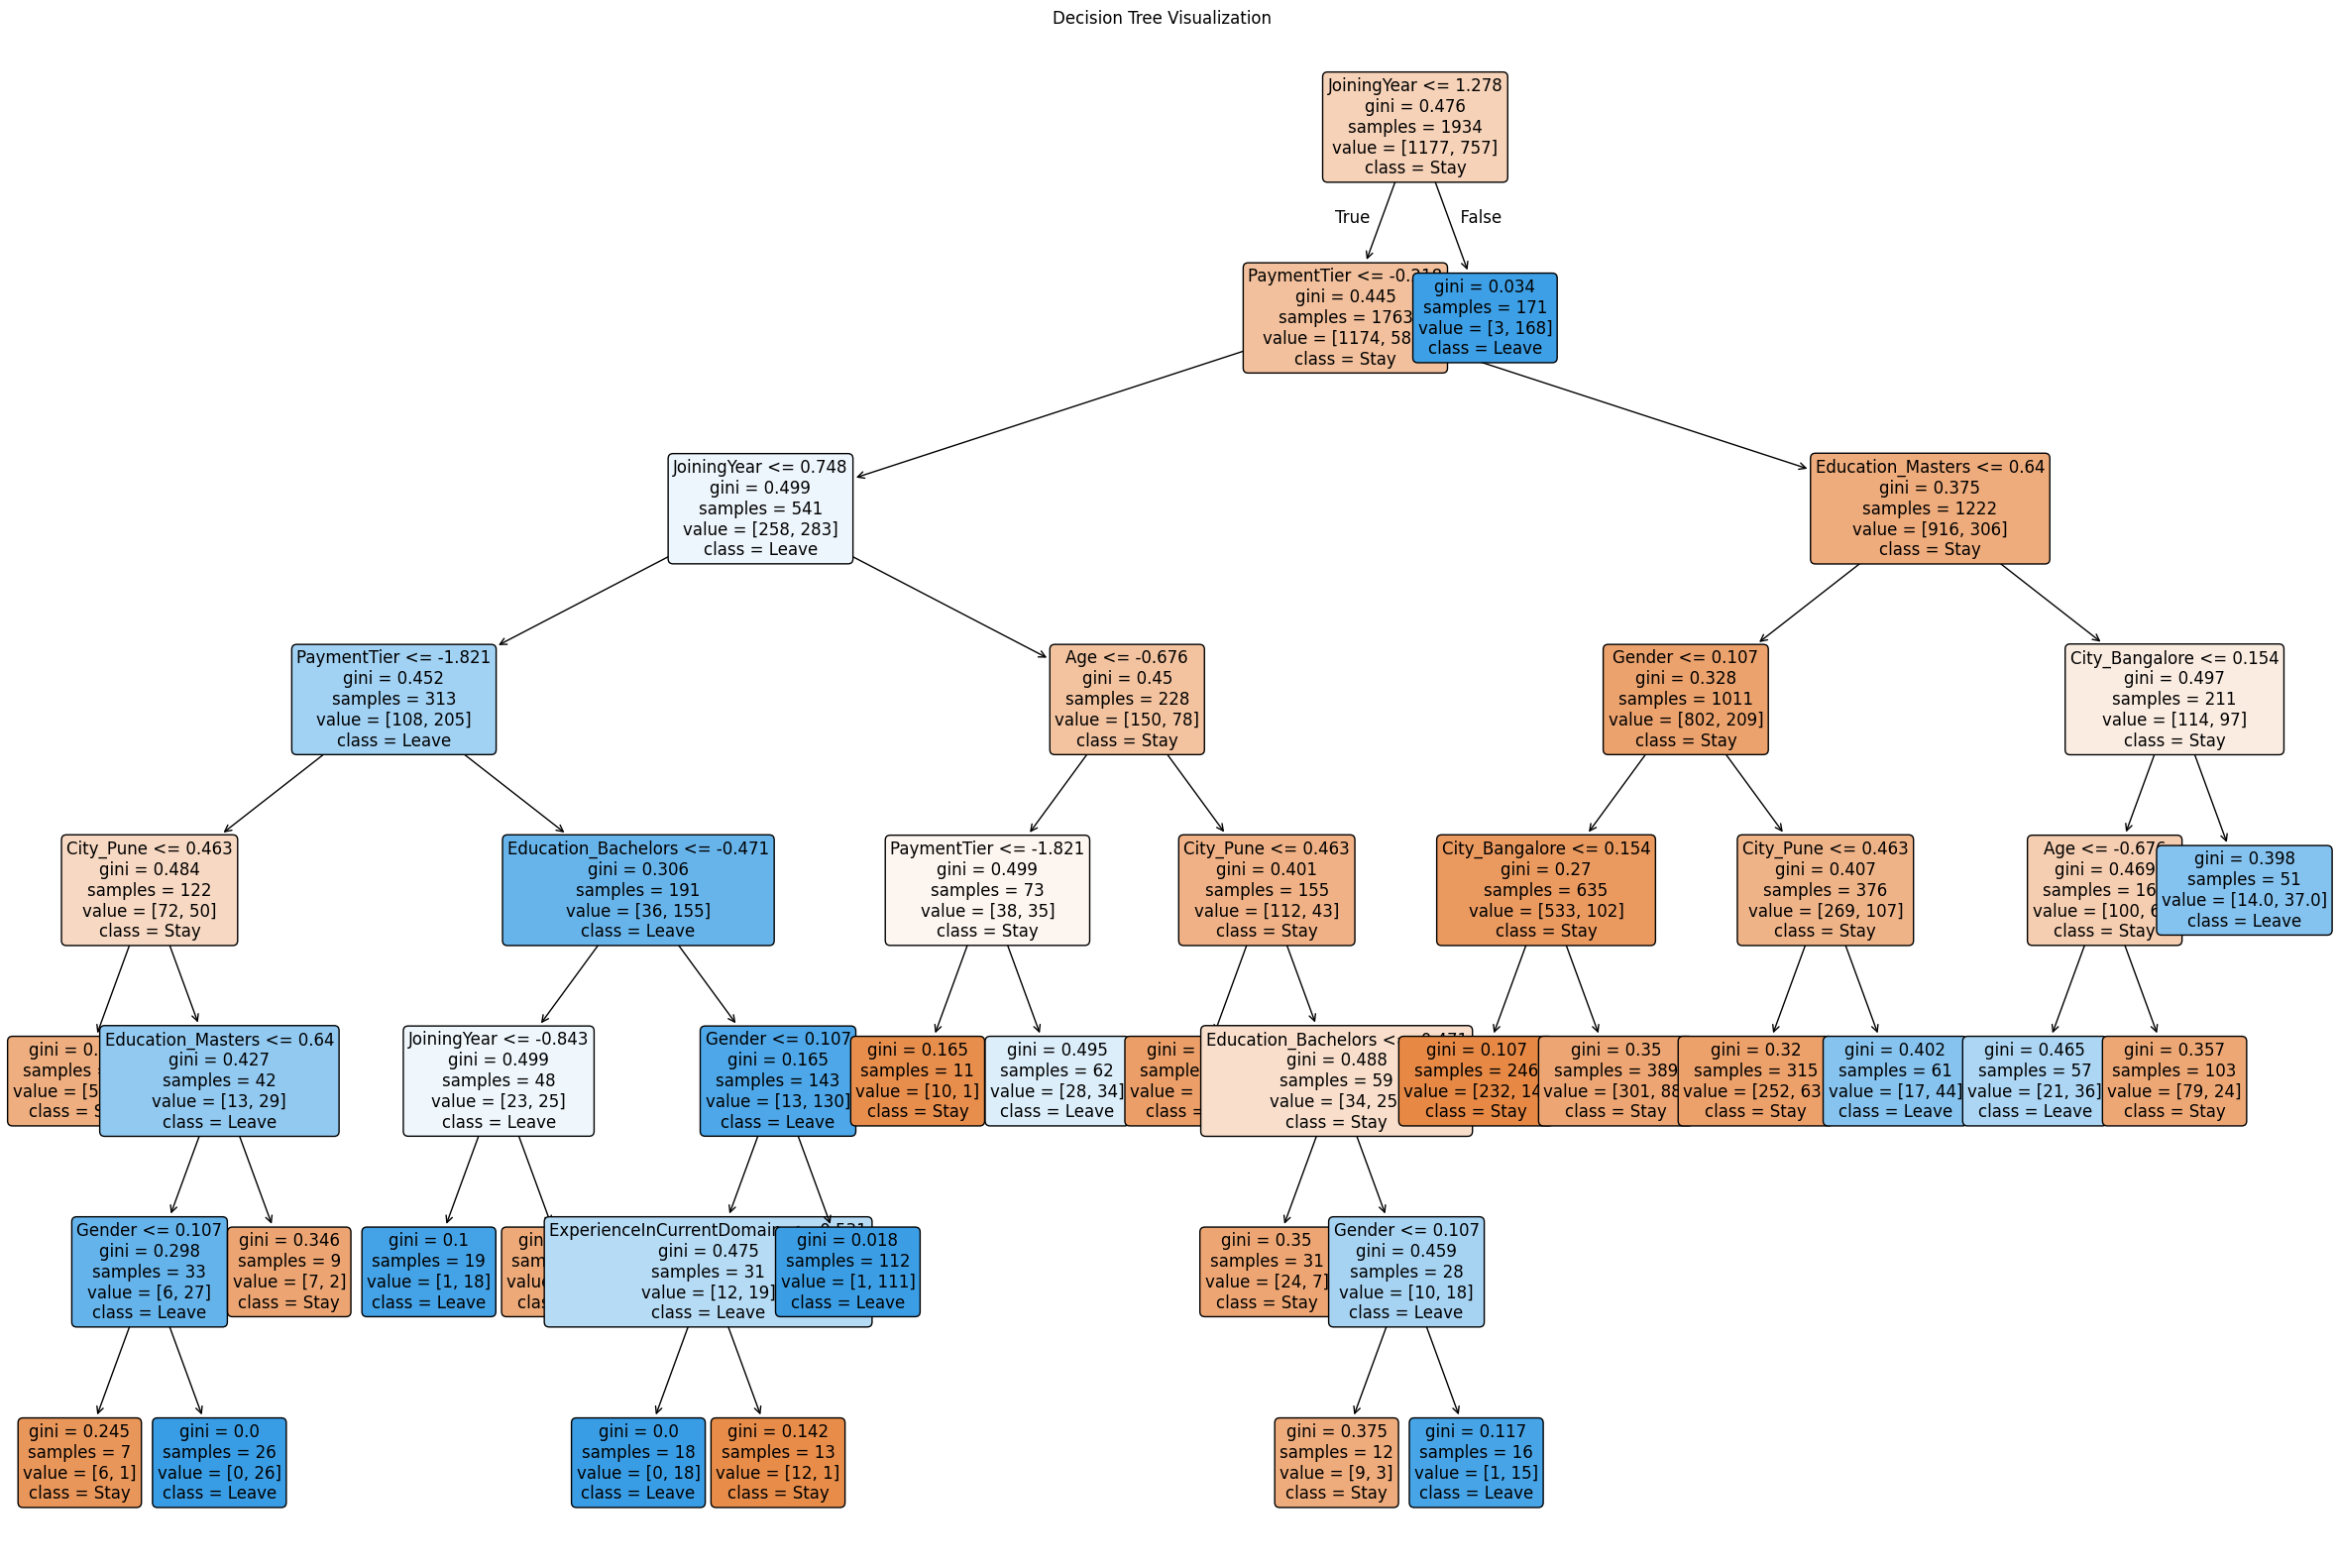

In [152]:
plt.figure(figsize=(30,20))
plot_tree(dt_model, 
          feature_names=data.drop('LeaveOrNot', axis=1).columns,  
          class_names=['Stay', 'Leave'], 
          filled=True,  
          rounded=True,
          fontsize=12)
plt.title("Decision Tree Visualization")
plt.show()

As you can see now, our tree is much more visible and easier to understand. However, we should remember that we shouldn't make the model too simple. `The art of machine learning` lies in tuning parameters so that our `model is neither too simple nor too complex`, achieving the best `balance between underfitting and overfitting` and `this is not an easy task!`

---

### `2.5` Summary of all classifiers  

In [153]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0)
    }

models = {
    "Logistic Regression": lr_model,
    "KNN (k=6)": knn_model,
    "Decision Tree (ccp_alpha=0.002)": dt_model  
}

metrics = {}

for name, model in models.items():
    metrics[name] = evaluate_model(model, X_test, y_test)

comparison_table = pd.DataFrame(metrics).round(3)

In [154]:
comparison_table

,Logistic Regression,KNN (k=6),Decision Tree (ccp_alpha=0.002)
Accuracy,0.683,0.749,0.805
Balanced Accuracy,0.642,0.705,0.777
Precision,0.652,0.812,0.831
Recall,0.441,0.483,0.640


`The Decision Tree` with ccp_alpha=0.002 clearly `outperforms` both `Logistic Regression` and `KNN` on **all key metrics**, showing the `best` overall `classification ability`

**Overall Conclusion:**
- The pruned Decision Tree model (ccp_alpha=0.002) is the strongest performer, balancing accuracy, precision, and recall very well
- KNN is a good middle-ground option, better than Logistic Regression but not quite as powerful as the Decision Tree here
- Logistic Regression is the least effective model in this scenario, especially in recall, indicating it misses a lot of positive cases

---

**Additional Note for End of this Module:**

It is important to know that depending on the problem at hand, different metrics might be more important.Here you can find some examples:
- If avoiding false alarms (false positives) is critical (e.g alarms are costly), focus on precision.
- If detecting as many positive cases as possible is necessary (e.g medical diagnoses), focus on recall.
- For balanced data with equal importance on both classes, accuracy or balanced accuracy often matters most.

**It’s important to clearly define which metric best reflects your business or research goal and optimize the model accordingly.**

---

### `2.5` Experiments

It is difficult to find a real-world dataset with exactly three features for a classification task. Therefore, we will generate an artificial dataset consisting of 300 samples, divided into three classes (each class containing 100 instances).
Our focus will not be on the code used to generate the dataset, but rather on how different classifiers perform on classifying new examples.

If you want bigger noise, make it bigger

In [155]:
## FOR TESTING:
noise = 5
##_________

np.random.seed(42)
n_samples = 100

centers = {
    0: [1, 1, 1],
    1: [5, 5, 5],
    2: [9, 1, 5]
}

# Generating artificial data
data = []
labels = []
for label, center in centers.items():
    x, y, z = np.random.multivariate_normal(mean=center, cov=noise*np.identity(3), size=n_samples).T
    class_data = np.column_stack((x, y, z))
    data.append(class_data)
    labels.extend([label]*n_samples)

data = np.vstack(data)
df = pd.DataFrame(data, columns=["x", "y", "z"])
df["class"] = labels
df

,x,y,z,class
0,2.110687,0.690832,2.448276,0
1,4.405598,0.476417,0.476454,0
2,4.531227,2.716036,-0.049777,0
3,2.213201,-0.036233,-0.041403,0
4,1.541044,-3.278225,-2.857034,0
...,...,...,...,...
295,13.129363,2.305703,4.196598,2
296,10.320744,3.479137,6.834654,2
297,10.134299,3.385157,7.614624,2
298,12.090601,2.450559,4.626313,2


Now we can see how our data looks in the table. Let's visualize it in 3D.

In [156]:
fig = go.Figure()

# Add one trace per class
for class_label in df['class'].unique():
    class_df = df[df['class'] == class_label]
    fig.add_trace(go.Scatter3d(
        x=class_df['x'],
        y=class_df['y'],
        z=class_df['z'],
        mode='markers',
        marker=dict(size=4),
        name=f'Class {class_label}'
    ))

fig.update_layout(
    title='3D Scatter Plot of Training Data with 3 Classes',
    scene=dict(
        xaxis_title='x',
        yaxis_title='y',
        zaxis_title='z'
    )
)

fig.show()

Now that we can imagine how it looks in 3D, let's build all three classifiers for this data.

In [157]:
# Features and target
X = df[['x', 'y', 'z']]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [158]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42, ccp_alpha=0.001)
}

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0, average='weighted'),
        "Recall": recall_score(y_test, y_pred, zero_division=0, average='weighted')
    }

metrics = {}

for name, model in models.items():
    # Use scaled data for just LR and KNN
    if name in ['Logistic Regression', 'KNN']:
        model.fit(X_train_scaled, y_train)
        metrics[name] = evaluate_model(model, X_test_scaled, y_test)

    else:
        model.fit(X_train, y_train)
        metrics[name] = evaluate_model(model, X_test, y_test)

Once we have created our classifiers, we can consider our model and try to classify a new example

In [159]:
# Our example that we want to classify
new_point = {'x': 2.34, 'y': 0.47, 'z': 7.15}
new_point_array = np.array([[new_point['x'], new_point['y'], new_point['z']]])

results = []
for name, model in models.items():
    # For LogisticRegression (fitted without feature names), use array
    if name in ['Logistic Regression', 'KNN']:
        y_pred = model.predict(new_point_array)
    else:
        # For other models (like DecisionTree, trained with DataFrame), use DataFrame
        y_pred = model.predict(pd.DataFrame([new_point]))
    results.append(y_pred[0])
#_______________________________________

fig = go.Figure()

for class_label in df['class'].unique():
    class_df = df[df['class'] == class_label]
    fig.add_trace(go.Scatter3d(
        x=class_df['x'],
        y=class_df['y'],
        z=class_df['z'],
        mode='markers',
        marker=dict(size=4),
        name=f'Class {class_label}'
    ))


fig.add_trace(go.Scatter3d(
    x=[new_point['x']],
    y=[new_point['y']],
    z=[new_point['z']],
    mode='markers+text',
    marker=dict(size=10, color='pink', symbol='x'),
    name='New Point -- ' \
    f'Logistic Regression: {results[0]} Class KNN: {results[1]} Class Decision Tree: {results[2]} Class',
    textposition='top center'
))

fig.update_layout(
    title='3D Scatter Plot with Disagreement Point',
    scene=dict(
        xaxis_title='x',
        yaxis_title='y',
        zaxis_title='x'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

fig.show()

We can see that for the most part our classifiers agree on the target class labels. However, there are of course many cases where they might vote differently. Let's find such a point :)
Again, we won't focus too much on the code that's responsible for finding such a point.

In [160]:
x_range = np.linspace(df['x'].min(), df['x'].max(), 20)
y_range = np.linspace(df['y'].min(), df['y'].max(), 20)
z_range = np.linspace(df['z'].min(), df['z'].max(), 20)

# Loop through grid 
for x in x_range:
    for y in y_range:
        for z in z_range:
            point = np.array([[x, y, z]])
            point_df = pd.DataFrame(point, columns=['x', 'y', 'z'])

            # Scaled for LR and KNN
            point_scaled = scaler.transform(point_df)

            pred_lr = models['Logistic Regression'].predict(point_scaled)[0]
            pred_knn = models['KNN'].predict(point_scaled)[0]
            pred_tree = models['Decision Tree'].predict(point_df)[0]

            preds = {pred_lr, pred_knn, pred_tree}
            if len(preds) == 3:
                print(f"Found disagreement at point: x={x:.2f}, y={y:.2f}, z={z:.2f}")
                print(f" - Logistic Regression: {pred_lr}")
                print(f" - KNN: {pred_knn}")
                print(f" - Decision Tree: {pred_tree}")
                break
        else:
            continue
        break
    else:
        continue
    break


Found disagreement at point: x=6.17, y=1.39, z=0.94
 - Logistic Regression: 2
 - KNN: 1
 - Decision Tree: 0


So, let's visualize this point and try to measure the correctness. Which model do we agree with the most?

In [161]:
# Our example that we want to classify
new_point = {'x': 2.34, 'y': 0.47, 'z': 7.15}

#_______________________________________

fig = go.Figure()

for class_label in df['class'].unique():
    class_df = df[df['class'] == class_label]
    fig.add_trace(go.Scatter3d(
        x=class_df['x'],
        y=class_df['y'],
        z=class_df['z'],
        mode='markers',
        marker=dict(size=4),
        name=f'Class {class_label}'
    ))


fig.add_trace(go.Scatter3d(
    x=[new_point['x']],
    y=[new_point['y']],
    z=[new_point['z']],
    mode='markers+text',
    marker=dict(size=10, color='pink', symbol='x'),
    name='New Point -- ' \
    f'Logistic Regression: 2 Class KNN: 1 Class Decision Tree: 0 Class',
    textposition='top center'
))

fig.update_layout(
    title='3D Scatter Plot with Disagreement Point',
    scene=dict(
        xaxis_title='x',
        yaxis_title='y',
        zaxis_title='x'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

fig.show()

So, let's summarize all the classifiers and decide which one we trust the most

In [162]:
comparison_table = pd.DataFrame(metrics).round(3)

In [163]:
comparison_table

,Logistic Regression,KNN,Decision Tree
Accuracy,0.911,0.900,0.900
Balanced Accuracy,0.906,0.894,0.894
Precision,0.910,0.899,0.900
Recall,0.911,0.900,0.900


---

### Task for you

Choose one of the methods and try building your own classifier.  
For those with more time, I encourage you to try implementing all the classifiers.

The dataset you'll be working on is the **Titanic** dataset.  
Yes, your task is to classify whether a person from the Titanic would survive or not.  
> *P.S. I checked the passenger list — unfortunately, the two main characters from the movie weren’t actually on board!*

I will help you with the first step (understanding the data), and the next steps (such as choosing a classifier) are up to you.

The dataset you can find in the GitHub repository as 'Titanic.csv'

You may also download it directly from the kaggle webpage 'train.csv' (you need to have the profile): https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset 

`If you like to have another jupyter notebook with me, we would focus on Multi class classification ->`
https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset 

In [164]:
data = pd.read_csv('datasets/Titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [165]:
# Checking the number of duplicates in the dataset
duplicates = data.duplicated().sum()
print(duplicates)

0


In [166]:
# Checking the null values in the dataset
missing_values = data.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Because there are many missing values, we will drop the column `Cabin`. Missing values in `Age` and `Embarked` will be replaced with the median and mode respectively. Additionally, we know that `PassengerId` and `Name` are unique identifiers, so we can drop them as well.

In [167]:
# Fill missing values
data['Age'] = data['Age'].fillna(data['Age'].median()) # median because Age is int
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0]) # mode becasue Embarked is categorical

# Drop columns: 'Cabin', 'PassengerId', 'Name'
data.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

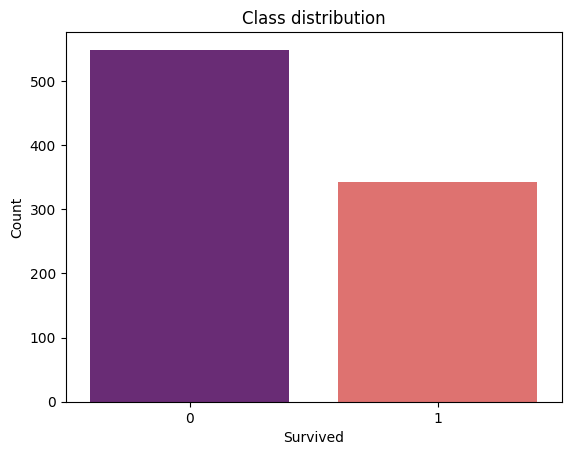

In [168]:
plt.figure()
sns.countplot(x='Survived', hue='Survived', data=data, palette='magma', legend=False)
plt.title("Class distribution")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

In [169]:
# Handling categorical values
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'])

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,False,True
1,1,1,1,38.0,1,0,71.2833,True,False,False
2,1,3,1,26.0,0,0,7.9250,False,False,True
3,1,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,0,35.0,0,0,8.0500,False,False,True


In [170]:
data[data.select_dtypes('bool').columns] = data.select_dtypes('bool').astype(int)

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


In [171]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [172]:
# Remember about Standarization
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

And now you have `X_train, X_test, y_train`, and `y_test`, and you're ready to build your first classifier. Of course, you can refer to the steps above and follow a similar approach. If you have any problems or if something was unclear, feel free to ask!

In [174]:
# STEP 1: Choose classifier
...

In [175]:
# STEP 2: Check metrics using test set
...

In [176]:
# STEP 3: Analyze results
...